In [84]:
# 导入第三方模块
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 可视化的中文处理
plt.rcParams['font.sans-serif'] = 'Microsoft YaHei'
plt.rcParams['axes.unicode_minus'] = False

# 设置类似R语言中的ggplot2风格
plt.style.use('ggplot')

# 读取数据(记得需要将csv文件先另存为UTF-8的编码，否则会报编码错误)
cars = pd.read_csv('second_cars_info.csv')

# “未上牌”的二手车占比
N = np.sum(cars.Boarding_time == '未上牌')
Ratio = N/cars.shape[0]
Ratio

0.0082439500044322305

In [85]:
# 由于未上牌的汽车数量占比极少，仅千分之八，这里不妨考虑将其删除
cars = cars.loc[cars.Boarding_time != '未上牌',:]


cars.index = range(0,cars.shape[0])
# 取出上牌时间变量中的年和月
cars['year'] = cars.Boarding_time.str[:4].astype('int')
month = cars.Boarding_time.str.findall('年(.*?)月')
# print(month.head(10))
# 由于month是列表构成的序列，所以需要非列表化，再序列化
month = pd.Series([i[0] for i in month]).astype('int')
cars['month'] = month

# 计算上牌日期距离2017年10月份的月数
cars['diff_months'] = (2018-cars.year)*12 + (1-cars.month) + 1
# 显示数据的前5行
cars.head(5)


,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,138
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,133
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,153
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,52
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,41


In [86]:

# 剔除“万公里”三个字
cars['Km_new'] = cars.Km.str[:-3]
# “百公里内”的样本量
N = np.sum(cars.Km == '百公里内')
Ratio = N/cars.shape[0]

# 将“百”字替换为0.005
cars.Km_new.replace('百','0.005', inplace=True)
# 剔除“万公里”三个字
cars['Km_new'] = cars.Km_new.str[:-3]
# 数据类型转换
cars.Km_new = cars.Km_new.astype('float')
cars.head()

,Brand,Name,Boarding_time,Km,Discharge,Sec_price,New_price,year,month,diff_months,Km_new
0,奥迪,奥迪A6L 2006款 2.4 CVT 舒适型,2006年8月,9.00万公里,国3,6.90,50.89万,2006,8,138,9.0
1,奥迪,奥迪A6L 2007款 2.4 CVT 舒适型,2007年1月,8.00万公里,国4,8.88,50.89万,2007,1,133,8.0
2,奥迪,奥迪A6L 2004款 2.4L 技术领先型,2005年5月,15.00万公里,国2,3.82,54.24万,2005,5,153,15.0
3,奥迪,奥迪A8L 2013款 45 TFSI quattro舒适型,2013年10月,4.80万公里,欧4,44.80,101.06万,2013,10,52,4.0
4,奥迪,奥迪A6L 2014款 30 FSI 豪华型,2014年9月,0.81万公里,"国4,国5",33.19,54.99万,2014,9,41,0.0


In [87]:
# 删除字段中的“万”字
cars['New_price_new'] = cars.New_price.str[:-1]

#cars.New_price_new.astype('float')
# 这里无法实现数据类型的转换，因为该字段中含有“暂无”这样的值。

# “暂无”的样本量
N = np.sum(cars.New_price == '暂无')
Ratio = N/cars.shape[0]
Ratio
cars = cars.loc[cars.New_price != '暂无',:]
# 数据类型的转换
cars.New_price_new = cars.New_price_new.astype('float')
cars.head()

# 数据集的概览信息
cars.describe()


,Sec_price,year,month,diff_months,Km_new,New_price_new
count,11047.000000,11047.000000,11047.000000,11047.000000,11047.000000,11047.000000
mean,26.081886,2011.669141,6.653571,71.316738,5.884494,51.725339
std,53.401052,3.003765,3.346884,35.880047,3.549151,80.081184
min,0.650000,1997.000000,1.000000,4.000000,0.000000,2.910000
25%,5.200000,2010.000000,4.000000,43.000000,3.000000,16.160000
50%,10.350000,2012.000000,7.000000,72.000000,6.000000,26.790000
75%,23.980000,2014.000000,9.000000,95.000000,8.000000,52.730000
max,808.000000,2017.000000,12.000000,242.000000,34.000000,976.920000


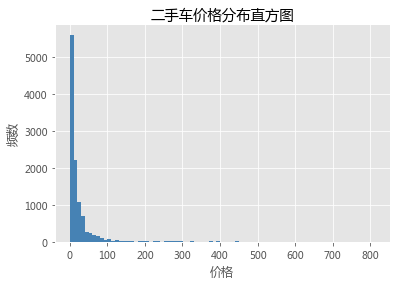

In [88]:
# 二手车价格分布情况
min_price = cars.Sec_price.min()
max_price = cars.Sec_price.max()

# 直方图
plt.hist(cars.Sec_price, # 二手车价格数据
         bins = np.arange(min_price,max_price+10,10), # 以10万元为组距
         color = 'steelblue', # 指定填充色
         )

# 设置坐标轴标签和标题
plt.title('二手车价格分布直方图')
plt.xlabel('价格')
plt.ylabel('频数')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 图形显示
plt.show()


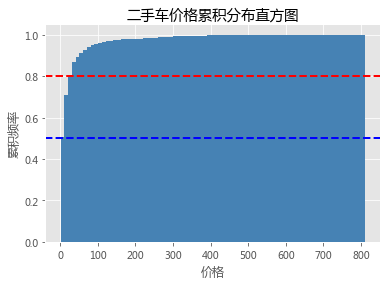

In [89]:
# 累积频率直方图
plt.hist(cars.Sec_price, # 二手车价格数据
         bins = np.arange(min_price,max_price+10,10), # 以10万元为组距
         normed = True, # 设置为频率直方图
         cumulative = True, # 积累直方图
         color = 'steelblue', # 指定填充色
         )

# 添加水平参考线
plt.axhline(y = 0.5, color = 'blue', linestyle = '--', linewidth = 2)
plt.axhline(y = 0.8, color = 'red', linestyle = '--', linewidth = 2)

# 设置坐标轴标签和标题
plt.title('二手车价格累积分布直方图')
plt.xlabel('价格')
plt.ylabel('累积频率')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 图形显示
plt.show()


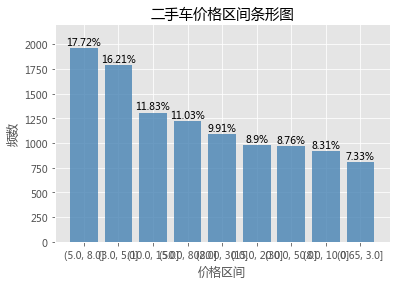

In [90]:
# 指定任意的切割点，将数据分段
price_cuts = pd.cut(cars.Sec_price, bins = [min_price,3,5,8,10,15,20,30,50,max_price])

# 按照数据段，进行数据的统计，即频数统计
price_stats = price_cuts.value_counts()

x = range(len(price_stats))
# 将索引用作绘图的刻度标签
label = price_stats.index
# 占比用于绘图的数值标签
percent = [str(round(i*100,2))+'%' for i in price_stats/price_stats.sum()]
# 绘图
plt.bar(x, # x轴数据
        price_stats, # y轴数据
        align = 'center', # 刻度居中对齐
        color='steelblue', # 填充色
        alpha = 0.8 # 透明度
       )

# 设置y轴的刻度范围
plt.ylim(0,2200)
# x轴刻度标签
plt.xticks(x,label)

# 设置坐标轴标签和标题
plt.title('二手车价格区间条形图')
plt.xlabel('价格区间')
plt.ylabel('频数')

# 去除图形顶部边界和右边界的刻度
plt.tick_params(top='off', right='off')

# 为每个条形图添加数值标签
for x,y,z in zip(x,price_stats,percent):
    plt.text(x, y+30,'%s' %z,ha='center')

# 显示图形
plt.show()

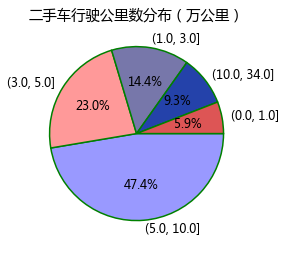

In [91]:
# 行驶公里数的饼图展现
km_min = cars.Km_new.min()
km_max = cars.Km_new.max()
# 指定任意的切割点，将数据分段
km_cuts = pd.cut(cars.Km_new, bins = [km_min, 1,3,5,10,km_max])
km_stats = km_cuts.value_counts()
km_stats

# 绘制饼图
# 将横、纵坐标轴标准化处理，保证饼图是一个正圆，否则为椭圆
plt.axes(aspect='equal')
# 提取出索引作为标签
labels = km_stats.index
# 自定义颜色
colors=['#9999ff','#ff9999','#7777aa','#2442aa','#dd5555'] 

# 绘制饼图
plt.pie(km_stats.values,
        labels=labels, 
        colors = colors, # 设置颜色
        autopct='%.1f%%', # 设置百分比的格式，这里保留一位小数
        counterclock = False, # 设置为顺时针方向
        wedgeprops = {'linewidth': 1.5, 'edgecolor':'green'},# 设置饼图内外边界的属性值
        textprops = {'fontsize':12, 'color':'k'} # 设置文本标签的属性值
       )

# 添加图标题
plt.title('二手车行驶公里数分布（万公里）')
# 显示图形   
plt.show()

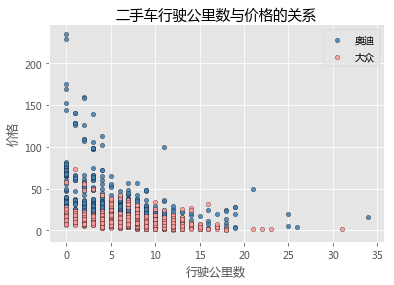

In [92]:
# 取出奥迪和大众两种车辆
index = cars['Brand'].isin(['奥迪','大众'])
some_cars = cars.loc[index,:]

# 散点图的绘制
brands = some_cars['Brand'].unique()
colors = ['steelblue', '#ff9999']

for i in range(len(brands)):
    
    plt.scatter(some_cars.loc[some_cars['Brand'] == brands[i],'Km_new'], # x轴数据为二手车行驶公里数
                some_cars.loc[some_cars['Brand'] == brands[i],'Sec_price'], # y轴数据为二手车价格
                s = 20, # 设置点的大小 
                c = colors[i], # 设置点的颜色
                marker = 'o', # 设置点的形状
                alpha = 0.9, # 设置点的透明度
                linewidths = 0.3, # 设置散点边界的粗细
                edgecolors = 'k', # 设置散点边界的颜色
                label = brands[i] # 添加标签
                )
    
# 添加轴标签和标题
plt.title('二手车行驶公里数与价格的关系')
plt.xlabel('行驶公里数')
plt.ylabel('价格')

# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图例
plt.legend()
# 显示图形
plt.show()

d:\python36\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  if sys.path[0] == '':
d:\python36\lib\site-packages\ipykernel_launcher.py:14: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  


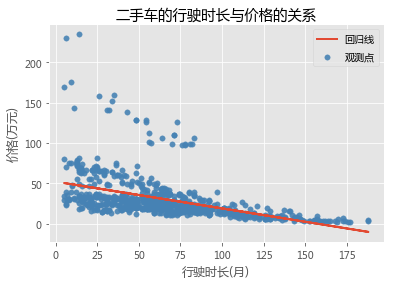

In [93]:
aodi_car = cars.loc[cars['Brand'] == '奥迪',:]
plt.scatter(aodi_car.diff_months, 
            aodi_car.Sec_price, 
            s = 30, # 设置点的大小 
            c = 'steelblue', # 设置点的颜色
            marker = 'o', # 设置点的形状
            alpha = 0.9, # 设置点的透明度
            linewidths = 0.3, # 设置散点边界的粗细
            label = '观测点')

# 建模
reg = LinearRegression().fit(aodi_car.diff_months.reshape(-1,1), aodi_car.Sec_price)
# 回归预测值
pred = reg.predict(aodi_car.diff_months.reshape(-1,1))

# 绘制回归线
plt.plot(aodi_car.diff_months, pred, linewidth = 2, label = '回归线')

# 添加轴标签和标题
plt.title('二手车的行驶时长与价格的关系')
plt.xlabel('行驶时长(月)')
plt.ylabel('价格(万元)')

# 去除图边框的顶部刻度和右边刻度
plt.tick_params(top = 'off', right = 'off')

# 显示图例
plt.legend(loc = 'best')
# 显示图形
plt.show()